In [16]:
import pandas as pd


df = pd.read_csv(r"D:\Python Course\Dealing With Pandas\csv\Day12.csv")

# Replace Comma
df["Open"] = (df["Open"].astype(str).str.replace(",",".").str.strip())
df["Close"] = (df["Open"].astype(str).str.replace(",",".").str.strip())
df["High"] = (df["High"].astype(str).str.replace(",",".").str.strip())
df["Low"] = (df["Low"].astype(str).str.replace(",",".").str.strip())

# Parse to Num
df["Open"] = pd.to_numeric(df["Open"])
df["Close"] = pd.to_numeric(df["Close"])
df["High"] = pd.to_numeric(df["High"])
df["Low"] = pd.to_numeric(df["Low"])
df["Volume"] = pd.to_numeric(df["Volume"])

df[:5]

,Open,Close,High,Low,Volume
0,42.93,42.93,42.96,42.56,729738
1,42.60,42.60,43.15,42.60,660183
2,42.93,42.93,42.96,42.27,1875091
3,42.62,42.62,43.66,42.62,952768
4,42.90,42.90,43.15,42.62,402361


In [20]:
# Make US Bussiness Calendar
from pandas.tseries.holiday import USFederalHolidayCalendar as US_Cal
from pandas.tseries.offsets import CustomBusinessDay as CBS

usB = CBS(calendar=US_Cal())

In [23]:
# Make Date Range W/ usB

dateRange = pd.date_range(start="2024/6/16", end="2024/7/5", freq=usB)
dateRange

DatetimeIndex(['2024-06-17', '2024-06-18', '2024-06-20', '2024-06-21',
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-05'],
              dtype='datetime64[ns]', freq='C')

In [25]:
# Set Date Into Index
df.set_index(dateRange, inplace=True)

<Axes: >

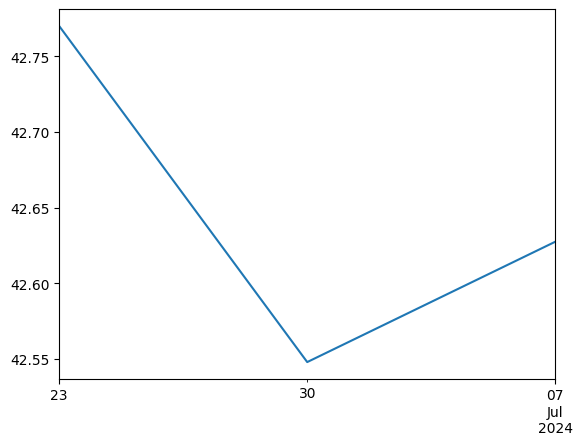

In [51]:
df
%matplotlib inline
df.loc["2024-06-17":"2024-07-1"].Open.resample("W").mean().dropna().plot(kind="line")